In [1]:
pip install yfinance arch

[*********************100%%**********************]  1 of 1 completed


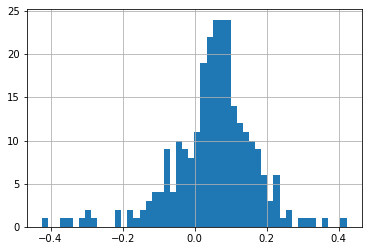

0.11541125023651462 0.05183165965277635


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ["VTI"]

vti = yf.download(tickers, interval="1mo")

vti["return_vti"] = vti["Adj Close"].pct_change(6).dropna()

std = vti["return_vti"].std()

mean = vti["return_vti"].mean()

vti["return_vti"].hist(bins=50)

plt.show()

print(std, mean)

C:\Users\marza\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01327. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


mu          0.074075
omega       0.000992
alpha[1]    0.748465
beta[1]     0.251535
Name: params, dtype: float64
                 h.1
Date                
2024-04-01  0.021321


C:\Users\marza\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


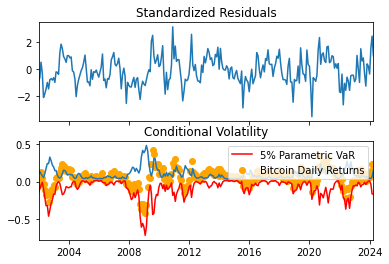

In [3]:
from arch import arch_model

#Modelo GARCH (1,1)

return_vti = vti["Adj Close"].pct_change(6).dropna()

arch = arch_model(return_vti, p=1, q=1, mean="constant", vol="GARCH", dist="normal")

gm_result = arch.fit(disp="off")

print(gm_result.params)

gm_result.plot()

gm_forecast = gm_result.forecast(start = "2002-01-01")

print(gm_forecast.variance[-1:])

gm_std = gm_result.conditional_volatility

#VaR

mean_forecast = gm_forecast.mean["2002-01-01":]

variance_forecast = gm_forecast.variance["2002-01-01":]

q_parametric = arch.distribution.ppf(0.05)

#Calculate the VaR
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric
#Save VaR in a DataFrame
VaR_parametric = pd.DataFrame(VaR_parametric, columns = ['5%'], index = variance_forecast.index)

#Plot the VaR
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,return_vti["2002-01-01":], color = 'orange', label = 'Bitcoin Daily Returns' )
plt.legend(loc = 'upper right')

(array([ 2.,  5., 11., 45., 71., 60., 47., 20.,  4.,  3.]),
 array([-3.49418175, -2.8352323 , -2.17628285, -1.51733339, -0.85838394,
        -0.19943449,  0.45951496,  1.11846442,  1.77741387,  2.43636332,
         3.09531277]),
 <a list of 10 Patch objects>)

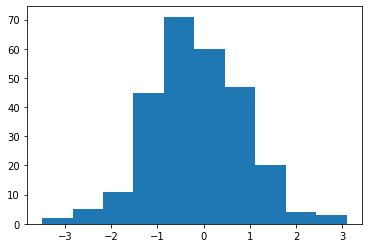

In [4]:
gm_std_resid = gm_result.resid / gm_result.conditional_volatility

plt.hist(gm_std_resid)

In [5]:
arch_t = arch_model(return_vti, p=1, q=1, mean="constant", vol="GARCH", dist="t")

arch_t_result = arch_t.fit(disp="off")

arch_t_result.summary()

C:\Users\marza\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01327. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                    Adj Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                285.732
Distribution:      Standardized Student's t   AIC:                          -561.464
Method:                  Maximum Likelihood   BIC:                          -543.509
                                              No. Observations:                  268
Date:                      Fri, Apr 26 2024   Df Residuals:                      267
Time:                              07:55:49   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0734  4.925e-03     14.897  3.451e-50 [6.371e-02,8.302e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.6877e-04  5.255e-04      1.843  6.527e-02 [-6.125e-05,1.999e-03]
alpha[1]       0.7515      0.144      5.219  1.799e-07      [  0.469,  1.034]
beta[1]        0.2485      0.134      1.848  6.454e-02   [-1.500e-02,  0.512]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu            27.4403     28.680      0.957      0.339 [-28.771, 83.652]
========================================================================

Covariance estimator: robust
"""

C:\Users\marza\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01327. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\marza\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01327. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                292.135
Distribution:                  Normal   AIC:                          -574.270
Method:            Maximum Likelihood   BIC:                          -556.315
                                        No. Observations:                  268
Date:                Fri, Apr 26 2024   Df Residuals:                      267
Time:                        07:55:53   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0712  1.526e-04    466.963      0.000 [7.

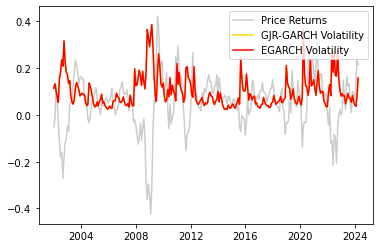

In [6]:
#Asymetric shocks 
#Specify model assumptions
gjrm_gm = arch_model(return_vti, p = 1, q = 1, o = 1, mean = "constant", vol = "EGARCH")

#Fit the model
gjrm_result = gjrm_gm.fit(disp = "off")

#Print model fitting summary
print(gjrm_result.summary())

# Specify model assumptions
egarch_gm = arch_model(return_vti, p = 1, q = 1, o = 1, vol = "EGARCH", dist = "t")

# Fit the model
egarch_result = egarch_gm.fit(disp = "off")

# Print model fitting summary
print(egarch_result.summary())

gjrgm_vol = gjrm_result.conditional_volatility

egarch_vol = egarch_result.conditional_volatility

# Plot the actual Bitcoin returns
plt.plot(return_vti, color = "grey", alpha = 0.4, label = "Price Returns")

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = "gold", label = "GJR-GARCH Volatility")

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = "red", label = "EGARCH Volatility")

plt.legend(loc = "upper right")
plt.show()